# Instrucciones globales
A continuación hay algunos ejercicios avanzados sobre Python. La resolución de los mismos debe cumplir con las siguientes directrices:
- El código debe estar comentado.
- Los nombres de variables, funciones y clases deben ser lógicos y descriptivos.
- El código debe ser lo más encapsulado posible, utilizando el mayor número de funciones y clases posible.
- Se debe perseguir la automatización del código, evitando de esta forma código repetido o redundante.
- Las clases deberán incluir constructor, getters, setters y str de forma predeterminada salvo excepción justificada
- Todos estos ejercicios tienen marge de mejora, ¡amplialos con alguna funcionalidad que se te ocurra!

## Enunciado ejercicio 1

Vamos a realizar un pequeño juego basado en un conocido juego de rol llamado HeroQuest. Vamos a crear la siguiente jerarquía de clases:

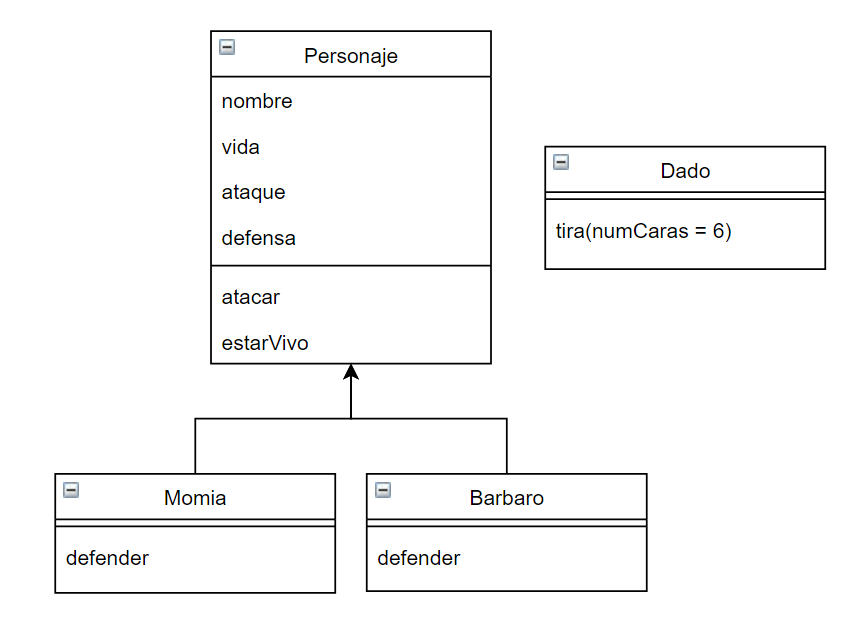

* Crearemos la clase principal __Personaje__ con:
    * Sus atributos definidos como privados.
    * Un __constructor__ **(``__init__``)**. 
    * El método **string (``__str__``)** sobreescrito, para que al imprimir por pantalla se vea la información correspondiente.
    * Métodos __getter__ y __setter__ de todos los atributos privados de la clase.
    * Un método **``estarVivo()``** que nos devuelva True si el personaje esta vivo (es decir, que su vida sea mayor que 0) o False en caso contrario.
    * Un método **``atacar()``** que realizará tantas tiradas de dado como indique el atributo __ataque__ del personaje. Si un personaje tiene __ataque=3__, en este método, se realizarán 3 tiradas de dado (_ver clase __Dado__ más abajo_). En el caso de que sean tiradas con dados estándar (6 caras), se considerará que se ha efectuado un impacto sobre el enemigo cuando el resultado de la tirada del dado sea __mayor que 3.__ Este método tiene que __devolver el número de impactos que se han logrado__.

* Creamos las clases hijas: __Momia__ y __Barbaro__ con:
    * Un __constructor__ **(``__init__``)** que inicialice a estos tipos de personaje. 
    * El método **string (``__str__``)** sobreescrito, para que al imprimir por pantalla se vea la información correspondiente.
    * Un método **``defender()``** el cuál recibe como parámetro un número entero que representa el número de impactos que el personaje tiene que intentar defender. Este parámetro lo podemos llamar __numImpactos__. Para saber si un personaje se puede defender de un ataque o no se realizarán tantas tiradas de dado como indique el aributo __defensa__ del personaje. Si un personaje tiene __defensa=3__, en este método, se realizarán 3 tiradas de dado (ver clase __Dado__ más abajo). En el caso de que sean tiradas con dados estándar (6 caras), se considerará que se ha efectuado un bloqueo del ataque por parte del enemigo cuando el resultado de la tirada del dado sea:
        * __igual a 6 en el caso de la Momia__. Es decir, necesita un 6 en la tirada para detener el impacto.
        * __mayor a 4 en el caso del Barbaro__. Es decir, necesita un 5 o un 6 para detener el impacto.
    * Tras las tiradas de defensa, se tienen que contabilizar los impactos sufridos al personaje (o lo que es lo mismo, los ataques que nos han podido ser defendidos) y se tiene que descontar este número de los puntos de __vida__ del personaje. 

* Creamos la clase: __Dado__, la cual simulará la tirada de un dado con:
    * Un único método llamado **``tira()``** que reciba como parámetro el número de caras del dado. Por defecto el dado tendrá 6 caras. Esta clase es una clase algo especial, ya que solo consta de un método, pero nos quedará preparada por si en un futuro se necesita insertar otro tipo de tirada. Utilizar random para la tirada.

#### Experimentación

* Crea una __momia__ y un __barbaro__
* Establece un __número máximo de turnos__ para la partida
* Inicia la partida
    * La partida finaliza cuando uno de los dos personajes muere (vida <= 0) o cuando se llega al número máximo de turnos establecido
    * Cada turno se compone de dos partes:
        * __Un personaje atacará al contrario y generará un número de impactos.__
        * __El contrario se tendrá que defender de ese número de impactos.__
    * El resultado de cada turno es un mensaje indicando cuantos impactos pudo bloquear el personaje que esta siendo atacado y que vida resultante le queda tras el ataque
* Cuando la partida finalice, se indicará cual es el __ganador__ y se mostrará el estado de ambos jugadores.
* Si ambos personajes quedan vivos cuando se llegue al número máximo de turnos, el resultado será de __TABLAS__ y se mostrará el estado de ambos jugadores igualmente.

Para las pruebas podemos definir a nuestros personajes con los siguientes valores (SON VALORES DE EJEMPLO, PODÉIS CAMBIARLOS AL GUSTO):
- Barbaro:
    - vida = 5
    - ataque = 4
    - defensa = 2
- Momia:
    - vida = 10
    - ataque = 2
    - defensa = 4

### Resultado

```python
¿Cuántos turnos máximos quiere jugar?: 10
 # TURNO 1 > B vs M
 >>> La momia Nefertiti no pudo bloquear 1 impactos y queda con 1 de vida
 # TURNO 2 > M vs B
 >>> El Barbaro Conan pudo bloquear totalmente el ataque y queda con 8 de vida
 # TURNO 3 > B vs M
 >>> La momia Nefertiti pudo bloquear totalmente el ataque y queda con 1 de vida
 # TURNO 4 > M vs B
 >>> El Barbaro Conan pudo bloquear totalmente el ataque y queda con 8 de vida
 # TURNO 5 > B vs M
 >>> La momia Nefertiti pudo bloquear totalmente el ataque y queda con 1 de vida
 # TURNO 6 > M vs B
 >>> El Barbaro Conan no pudo bloquear 2 impactos y queda con 6 de vida
 # TURNO 7 > B vs M
 >>> La momia Nefertiti no pudo bloquear 1 impactos y queda con 0 de vida

 > GANADOR BARBARO Conan
	 >>> Barbaro Conan con 6 de vida 
	 >>> Momia Nefertiti con 0 de vida
```

In [1]:
#importar metodo ramdom para las tiradas de dados
import random
#empiezo creando la clase padre 
class Personaje:
    def __init__(self, vida, ataque, defensa):
        self.__vida = vida
        self.__ataque = ataque
        self.__defensa = defensa

    def __str__(self):
        return f"Punto de vida: {self.__vida}, Puntos de ataque: {self.__ataque}, Puntos de defensa: {self.__defensa}"

    #Getter
    @property
    def vida(self):
        return self.__vida

    #Setter
    @vida.setter
    def vida(self, vida):
        self.__vida = vida
    
    #Getter
    @property
    def ataque(self):
        return self.__ataque

    #Setter
    @ataque.setter
    def ataque(self, ataque):
        self.__ataque = ataque
        
    #Getter
    @property
    def defensa(self):
        return self.__defensa

    #Setter
    @defensa.setter
    def defensa(self, vida):
        self.__defensa = defensa
        
    #implemetno el metodo estar vivo  
    def estar_vivo(self):
        return self.__vida > 0
    #implemento el metodo atacar
    def atacar(self):
        impactos = 0
        for _ in range(self.__ataque):
            if random.randint(1, 6) > 3:
                impactos += 1
        return impactos
#creo el objeto momia e implemento sus metodos
class Momia(Personaje):
    def __init__(self):
        super().__init__(vida=10, ataque=3, defensa=3)

    def defender(self, num_impactos):
        dado = Dado()  # Crear una instancia de la clase Dado
        impactos_defendidos = 0
        for _ in range(self.defensa):
            if Dado.tirar == 6:
                impactos_defendidos += 1
        impactos_recibidos = num_impactos - impactos_defendidos
        self.vida -= impactos_recibidos  
        return impactos_defendidos, self.vida  
#creo el objeto barbaro e implemento sus metodos
class Barbaro(Personaje):
    def __init__(self):
        super().__init__(vida=15, ataque=4, defensa=3)

    def defender(self, num_impactos):
        dado = Dado()  
        impactos_defendidos = 0
        for _ in range(self.defensa):
            if Dado.tirar(6) > 4:
                impactos_defendidos += 1
        impactos_recibidos = num_impactos - impactos_defendidos
        self.vida -= impactos_recibidos
        return impactos_defendidos, self.vida
#creo el metodo dado y uso ramdom.randit para las tiradas
class Dado:
    def tirar(self, caras=6):
        return random.randint(1, caras)

# Creo momia y bárbaro
momia = Momia()
barbaro = Barbaro()

#Designo el número máximo de turnos
max_turnos = 10
turno = 1

# Iniciao la partida
while momia.estar_vivo() and barbaro.estar_vivo() and turno <= max_turnos:
    print(f"Turno {turno}:")
    impactos_momia = barbaro.atacar()
    impactos_defendidos, vida_restante_momia = momia.defender(impactos_momia)
    print(f"El bárbaro ataca y logra {impactos_momia} impactos.")
    print(f"La momia defiende y logra bloquear {impactos_defendidos} impactos. Vida restante: {vida_restante_momia}")
    
    impactos_barbaro = momia.atacar()
    impactos_defendidos, vida_restante_barbaro = barbaro.defender(impactos_barbaro)
    print(f"La momia ataca y logra {impactos_barbaro} impactos.")
    print(f"El bárbaro defiende y logra bloquear {impactos_defendidos} impactos. Vida restante: {vida_restante_barbaro}")

    turno += 1

# Resultado de la partida
if not momia.estar_vivo():
    print("La momia ha sido derrotada. ¡El bárbaro gana!")
elif not barbaro.estar_vivo():
    print("El bárbaro ha sido derrotado. ¡La momia gana!")
else:
    print("La partida ha terminado en empate.")

Turno 1:
El bárbaro ataca y logra 2 impactos.
La momia defiende y logra bloquear 0 impactos. Vida restante: 8
La momia ataca y logra 2 impactos.
El bárbaro defiende y logra bloquear 1 impactos. Vida restante: 14
Turno 2:
El bárbaro ataca y logra 2 impactos.
La momia defiende y logra bloquear 0 impactos. Vida restante: 6
La momia ataca y logra 1 impactos.
El bárbaro defiende y logra bloquear 0 impactos. Vida restante: 13
Turno 3:
El bárbaro ataca y logra 4 impactos.
La momia defiende y logra bloquear 0 impactos. Vida restante: 2
La momia ataca y logra 3 impactos.
El bárbaro defiende y logra bloquear 1 impactos. Vida restante: 11
Turno 4:
El bárbaro ataca y logra 3 impactos.
La momia defiende y logra bloquear 0 impactos. Vida restante: -1
La momia ataca y logra 0 impactos.
El bárbaro defiende y logra bloquear 1 impactos. Vida restante: 12
La momia ha sido derrotada. ¡El bárbaro gana!


## Enunciado ejercicio 2

Crea un programa en Python que modele a superhéroes y sus equipos siguiendo la siguiente jerarquía de clases y los siguientes  requisitos:

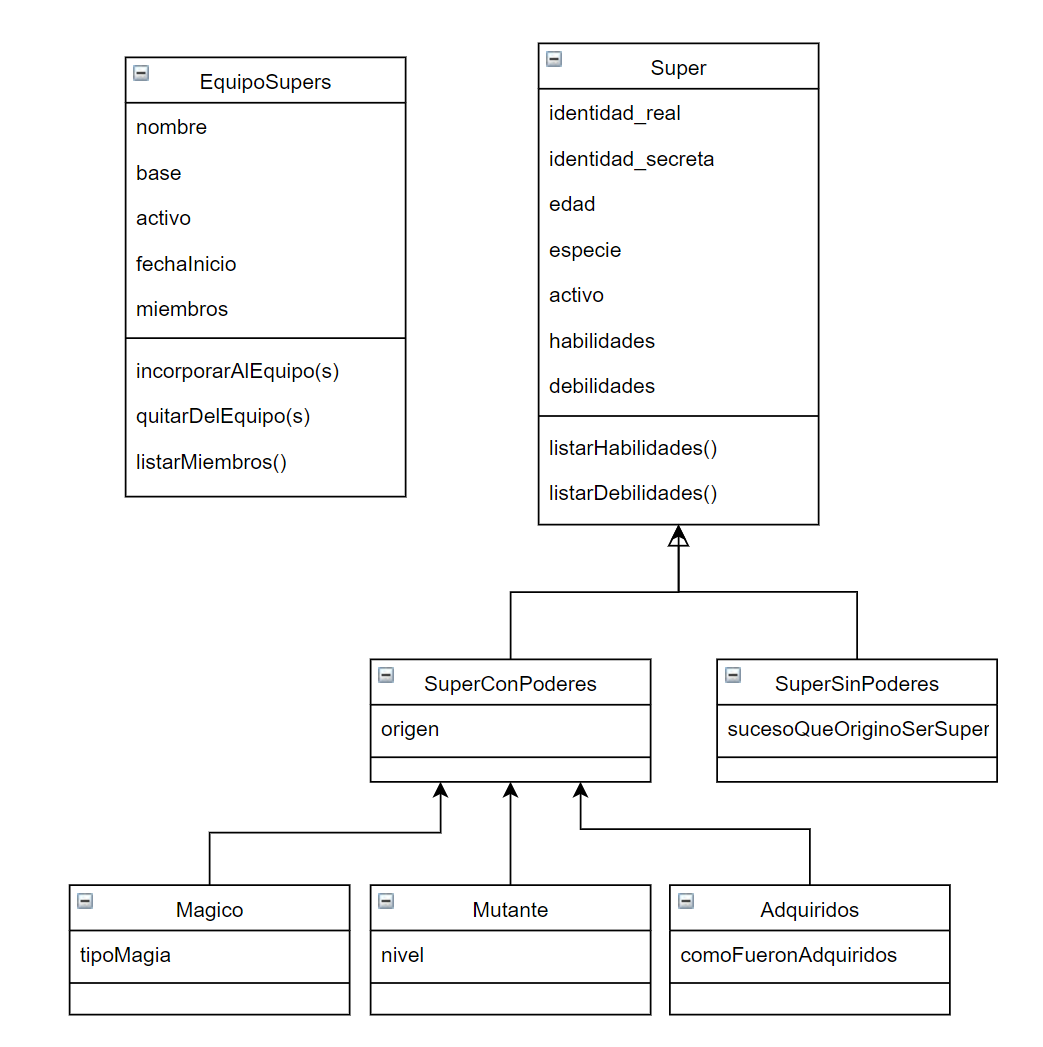

1. Diseña una clase __Super__ que represente a un superhéroe genérico con las siguientes propiedades:

    - Identidad real
    - Identidad secreta
    - Edad
    - Especie
    - Estado activo/inactivo
    - Lista de habilidades
    - Lista de debilidades

Además, la clase debe tener métodos para listar sus habilidades y debilidades.
<br><br>
2. Crea tres clases derivadas de Super: __SuperConPoderes, SuperSinPoderes y Mutante__.

    - SuperConPoderes debe incluir una propiedad que indique el origen de sus poderes (sólo válido "Nacimiento", "Adquiridos" o "Desconocido" en su defecto) y sobrescribir el método __str__() para incluir esta información en la salida.
    - SuperSinPoderes debe incluir una propiedad que indique el suceso que lo convirtió en un superhéroe y sobrescribir el método __str__() para incluir esta información en la salida.
    - Mutante debe heredar de SuperConPoderes y agregar una propiedad que indique su nivel de habilidades mutantes y sobrescribir el método __str__() para incluir esta información en la salida.

3. Crea dos clases adicionales derivadas de SuperConPoderes: __Magico y Adquiridos__.

    - Magico debe agregar una propiedad que indique el tipo de magia que utiliza y sobrescribir el método __str__() para incluir esta información en la salida.
    - Adquiridos debe agregar una propiedad que describa cómo adquirieron sus poderes y sobrescribir el método __str__() para incluir esta información en la salida.

4. Diseña una clase __EquipoSupers__ que represente a un equipo de superhéroes con las siguientes propiedades:

    - Nombre del equipo
    - Ubicación de su base
    - Estado activo/inactivo
    - Fecha de inicio
    - Lista de miembros

La clase debe tener métodos para incorporar un superhéroe al equipo, quitar un superhéroe del equipo y listar a los miembros del equipo.
<br><br>
5. Crea instancias de las diferentes clases de superhéroes y un equipo. Añade y quita miembros del equipo y muestra información sobre los superhéroes y el equipo utilizando los métodos correspondientes. Prueba TODOS los métodos desarrollados.

In [2]:
class Super:#Creamos la clase Super que es padre de super sin poderes y super sin poderes
    def __init__ (self, identidad_real, identidad_secreta, edad, especie, estado, lista_de_habilidades, lista_de_debilidades):
        self.__identidad_real = identidad_real
        self.__identidad_secreta = identidad_secreta
        self.__edad = edad
        self.__especie = especie
        self.__estado = estado
        self.__lista_de_habilidades = lista_de_habilidades
        self.__lista_de_debilidades = lista_de_debilidades
    
    def listar_habilidades(self):#Creo el metodo de las habilidades
        print("Habilidades:")
        for habilidad in self.__habilidades:
            print(habilidad)

    def listar_debilidades(self):#Creo el metodo de los debilidades
        print("Debilidades:")
        for debilidad in self.__debilidades:
            print(debilidad)
                
    #Getter
    @property
    def identidad_real(self):
        return self.__identidad_real

    #Setter
    @identidad_real.setter
    def identidad_real(self, identidad_real):
        self.__identidad_real = identidad_real
        
    #Getter
    @property
    def identidad_secreta(self):
        return self.__identidad_secreta

    #Setter
    @identidad_secreta.setter
    def identidad_secreta(self, identidad_secreta):
        self.__identidad_secreta = identidad_secreta
        
    #Getter
    @property
    def edad(self):
        return self.__edad

    #Setter
    @edad.setter
    def edad(self, edad):
        self.__edad = edad
        
    #Getter
    @property
    def especie(self):
        return self.__especie

    #Setter
    @especie.setter
    def especie(self, especie):
        self.__especie = especie
        
    #Getter
    @property
    def estado(self):
        return self.__estado

    #Setter
    @estado.setter
    def estado(self, estado):
        self.__estado = estado
        
    #Getter
    @property
    def lista_de_habilidades(self):
        return self.__lista_de_habilidades

    #Setter
    @lista_de_habilidades.setter
    def lista_de_habilidades(self, lista_de_habilidades):
        self.__lista_de_habilidades = lista_de_habilidades
        
    #Getter
    @property
    def lista_de_debilidades(self):
        return self.__lista_de_debilidades

    #Setter
    @lista_de_debilidades.setter
    def vida(self, lista_de_debilidades):
        self.__lista_de_debilidades = lista_de_debilidades
    
    
    def __str__(self):#Defino el metodo srt
        return " > Identidad real: {}\n > Identidad secreta: {}\n > Edad: {}\n > Especie: {}\n > Estado: {}\n > Lista de habilidades: {}\n > Lista de debilidades{}".format(self.identidad_real, 
                                                                                                                                                                    self.identidad_secreta,
                                                                                                                                                                    self.edad,
                                                                                                                                                                    self.especie, 
                                                                                                                                                                    self.estado, 
                                                                                                                                                                    self.lista_de_habilidades,
                                                                                                                                                                    self.lista_de_debilidades )
    

class Super_con_poderes(Super):#Defino el objeto hijo de super
    def __init__ (self, identidad_real, identidad_secreta, edad, especie, estado, lista_de_habilidades, lista_de_debilidades, origen):
        super().__init__(identidad_real, identidad_secreta, edad, especie, estado, lista_de_habilidades, lista_de_debilidades)
        self.__origen = origen
    
    #Getter
    @property
    def origen(self):
        return self.__origen

    #Setter
    @origen.setter
    def origen(self, origen):
        self.__origen = origen
        
    def __str__(self):#Defino el metodo srt
        return " > Identidad real: {}\n > Identidad secreta: {}\n > Edad: {}\n > Especie: {}\n > Estado: {}\n > Lista de habilidades: {}\n > Lista de debilidades{}\n > Origen:{}".format(self.identidad_real, 
                                                                                                                                                                                self.identidad_secreta,
                                                                                                                                                                                self.edad,
                                                                                                                                                                                self.especie, 
                                                                                                                                                                                self.estado, 
                                                                                                                                                                                self.lista_de_habilidades,
                                                                                                                                                                                self.lista_de_debilidades,
                                                                                                                                                                                self.origen)

class Mago(Super_con_poderes):#Defino el objeto hijo de super con poderes
    def __init__ (self, identidad_real, identidad_secreta, edad, especie, estado, lista_de_habilidades, lista_de_debilidades, origen, tipo_magia):
        super().__init__(identidad_real, identidad_secreta, edad, especie, estado, lista_de_habilidades, lista_de_debilidades, origen)
        self.__tipo_magia = tipo_magia
    
    #Getter
    @property
    def tipo_magia(self):
        return self.__tipo_magia

    #Setter
    @tipo_magia.setter
    def origen(self, tipo_magia):
        self.__tipo_magia = tipo_magia
        
    def __str__(self):#Defino el metodo srt
        return " > Identidad real: {}\n > Identidad secreta: {}\n > Edad: {}\n > Especie: {}\n > Estado: {}\n > Lista de habilidades: {}\n > Lista de debilidades{}\n > Origen:{}\n > Tipo de magia:{}".format(self.identidad_real, 
                                                                                                                                                                                                   self.identidad_secreta,
                                                                                                                                                                                                   self.edad,
                                                                                                                                                                                                   self.especie, 
                                                                                                                                                                                                   self.estado, 
                                                                                                                                                                                                   self.lista_de_habilidades,
                                                                                                                                                                                                   self.lista_de_debilidades,
                                                                                                                                                                                                   self.origen,
                                                                                                                                                                                                   self.tipo_magia)
    
class Mutante(Super_con_poderes):#Defino el objeto hijo de super con poderes
    def __init__ (self, identidad_real, identidad_secreta, edad, especie, estado, lista_de_habilidades, lista_de_debilidades, origen, nivel):
        super().__init__(identidad_real, identidad_secreta, edad, especie, estado, lista_de_habilidades, lista_de_debilidades, origen)
        self.__nivel = nivel
    
    #Getter
    @property
    def nivel(self):
        return self.__nivel

    #Setter
    @nivel.setter
    def nivel(self, nivel):
        self.__nivel = nivel
        
    def __str__(self):#Defino el metodo srt
        return " > Identidad real: {}\n > Identidad secreta: {}\n > Edad: {}\n > Especie: {}\n > Estado: {}\n > Lista de habilidades: {}\n > Lista de debilidades{}\n > Origen:{}\n > Nivel:{}".format(self.identidad_real, 
                                                                                                                                                                                           self.identidad_secreta,
                                                                                                                                                                                           self.edad,
                                                                                                                                                                                           self.especie, 
                                                                                                                                                                                           self.estado, 
                                                                                                                                                                                           self.lista_de_habilidades,
                                                                                                                                                                                           self.lista_de_debilidades,
                                                                                                                                                                                           self.origen,
                                                                                                                                                                                           self.nivel)
class Adquiridos(Super_con_poderes):#Defino el objeto hijo de super con poderes
    def __init__ (self, identidad_real, identidad_secreta, edad, especie, estado, lista_de_habilidades, lista_de_debilidades, origen, nivel):
        super().__init__(identidad_real, identidad_secreta, edad, especie, estado, lista_de_habilidades, lista_de_debilidades, origen)
        self.__adquiridos = adquiridos
    
    #Getter
    @property
    def adquiridos(self):
        return self.__adquiridos

    #Setter
    @adquiridos.setter
    def adquiridos(self, adquiridos):
        self.__adquiridos = adquiridos
        
    def __str__(self):#Defino el metodo srt
        return " > Identidad real: {}\n > Identidad secreta: {}\n > Edad: {}\n > Especie: {}\n > Estado: {}\n > Lista de habilidades: {}\n > Lista de debilidades{}\n > Origen:{}\n > Adquiridos:{}".format(self.identidad_real, 
                                                                                                                                                                                                self.identidad_secreta,
                                                                                                                                                                                                self.edad,
                                                                                                                                                                                                self.especie, 
                                                                                                                                                                                                self.estado, 
                                                                                                                                                                                                self.lista_de_habilidades,
                                                                                                                                                                                                self.lista_de_debilidades,
                                                                                                                                                                                                self.origen,
                                                                                                                                                                                                self.adquiridos)
    
class Super_sin_poderes(Super):#Defino el objeto hijo de super
    def __init__ (self, identidad_real, identidad_secreta, edad, especie, estado, lista_de_habilidades, lista_de_debilidades, suceso_que_origino_ser_super):
        super().__init__(identidad_real, identidad_secreta, edad, especie, estado, lista_de_habilidades, lista_de_debilidades)
        self.__suceso_que_origino_ser_super = suceso_que_origino_ser_super
    
    #Getter
    @property
    def suceso_que_origino_ser_super(self):
        return self.__suceso_que_origino_ser_super

    #Setter
    @suceso_que_origino_ser_super.setter
    def suceso_que_origino_ser_super(self, suceso_que_origino_ser_super):
        self.__suceso_que_origino_ser_super = suceso_que_origino_ser_super
        
    def __str__(self):#Defino el metodo srt
        return " > Identidad real: {}\n > Identidad secreta: {}\n > Edad: {}\n > Especie: {}\n > Estado: {}\n > Lista de habilidades: {}\n > Lista de debilidades{}\n > Suceso que origino ser super:{}".format(self.identidad_real, 
                                                                                                                                                                                                      self.identidad_secreta,
                                                                                                                                                                                                      self.edad,
                                                                                                                                                                                                      self.especie, 
                                                                                                                                                                                                      self.estado, 
                                                                                                                                                                                                      self.lista_de_habilidades,
                                                                                                                                                                                                      self.lista_de_debilidades,
                                                                                                                                                                                                      self.suceso_que_origino_ser_super)

class EquipoSupers:#Defino objetopara organizar equipos
    def __init__(self, nombre_equipo, base, estado_activo, fecha_inicio):
        self.__nombre_equipo = nombre_equipo
        self.__base = base
        self.__estado_activo = estado_activo
        self.__fecha_inicio = fecha_inicio
        self.__miembros = []

    def incorporar_miembro(self, superheroe):#metodo pra incorporar miembros
        self.__miembros.append(superheroe)

    def quitar_miembro(self, superheroe):#Metodo para sacar miembros
        self.__miembros.remove(superheroe)

    def listar_miembros(self):#Metodo para mostrar los miembros
        print("Miembros del equipo:")
        for miembro in self.__miembros:
            print(miembro.identidad_secreta)
            
    #Getter
    @property
    def nombre_equipo(self):
        return self.__nombre_equipo

    #Setter
    @nombre_equipo.setter
    def nombre_equipo(self, nombre_equipo):
        self.__nombre_equipo = nombre_equipo
        
    #Getter
    @property
    def base(self):
        return self.__base

    #Setter
    @base.setter
    def base(self, base):
        self.__base = base
        
    #Getter
    @property
    def estado_activo(self):
        return self.__estado_activo

    #Setter
    @estado_activo.setter
    def estado_activo(self, estado_activo):
        self.__estado_activo = estado_activo
        
    #Getter
    @property
    def fecha_inicio(self):
        return self.__fecha_inicio

    #Setter
    @fecha_inicio.setter
    def nivel(self, fecha_inicio):
        self.__fecha_inicio = fecha_inicio
        
    #Getter
    @property
    def miembros(self):
        return self.__miembros

    #Setter
    @miembros.setter
    def nivel(self, miembros):
        self.__miembros = miembros
        

# Crear instancias de superhéroes
superpoderes1 = Super_con_poderes("Clark Kent", "Superman", 30, "Kryptoniano", True, ["Super fuerza", "Vuelo"], ["Kriptonita"], "Nacimiento")
sinpoderes1 = Super_sin_poderes("Bruce Wayne", "Batman", 35, "Humano", True, ["Inteligencia", "Combate cuerpo a cuerpo"], ["Humano"], "Tragedia familiar")
mutante1 = Mutante("Scott Summers", "Cíclope", 25, "Mutante", True, ["Rayos ópticos", "Liderazgo"], ["Control de rayos"], "Nacimiento", "Alto")

# Crear instancias de equipo
equipo1 = EquipoSupers("Liga de la Justicia", "La Torre", True, "01/01/2000")

# Añadir superhéroes al equipo
equipo1.incorporar_miembro(superpoderes1)
equipo1.incorporar_miembro(sinpoderes1)
equipo1.incorporar_miembro(mutante1)

# Mostrar información de los superhéroes y el equipo
print(superpoderes1)
print("\n")
print(sinpoderes1)
print("\n")
print(mutante1)
print("\n")
equipo1.listar_miembros()
print("\n")
# Quitar un miembro del equipo
equipo1.quitar_miembro(sinpoderes1)
equipo1.listar_miembros()

 > Identidad real: Clark Kent
 > Identidad secreta: Superman
 > Edad: 30
 > Especie: Kryptoniano
 > Estado: True
 > Lista de habilidades: ['Super fuerza', 'Vuelo']
 > Lista de debilidades['Kriptonita']
 > Origen:Nacimiento


 > Identidad real: Bruce Wayne
 > Identidad secreta: Batman
 > Edad: 35
 > Especie: Humano
 > Estado: True
 > Lista de habilidades: ['Inteligencia', 'Combate cuerpo a cuerpo']
 > Lista de debilidades['Humano']
 > Suceso que origino ser super:Tragedia familiar


 > Identidad real: Scott Summers
 > Identidad secreta: Cíclope
 > Edad: 25
 > Especie: Mutante
 > Estado: True
 > Lista de habilidades: ['Rayos ópticos', 'Liderazgo']
 > Lista de debilidades['Control de rayos']
 > Origen:Nacimiento
 > Nivel:Alto


Miembros del equipo:
Superman
Batman
Cíclope


Miembros del equipo:
Superman
Cíclope


## Enunciado ejercicio 3

Crea un programa en Python que modele una aerolínea siguiendo la siguiente jerarquía de clases y los siguientes requisitos:

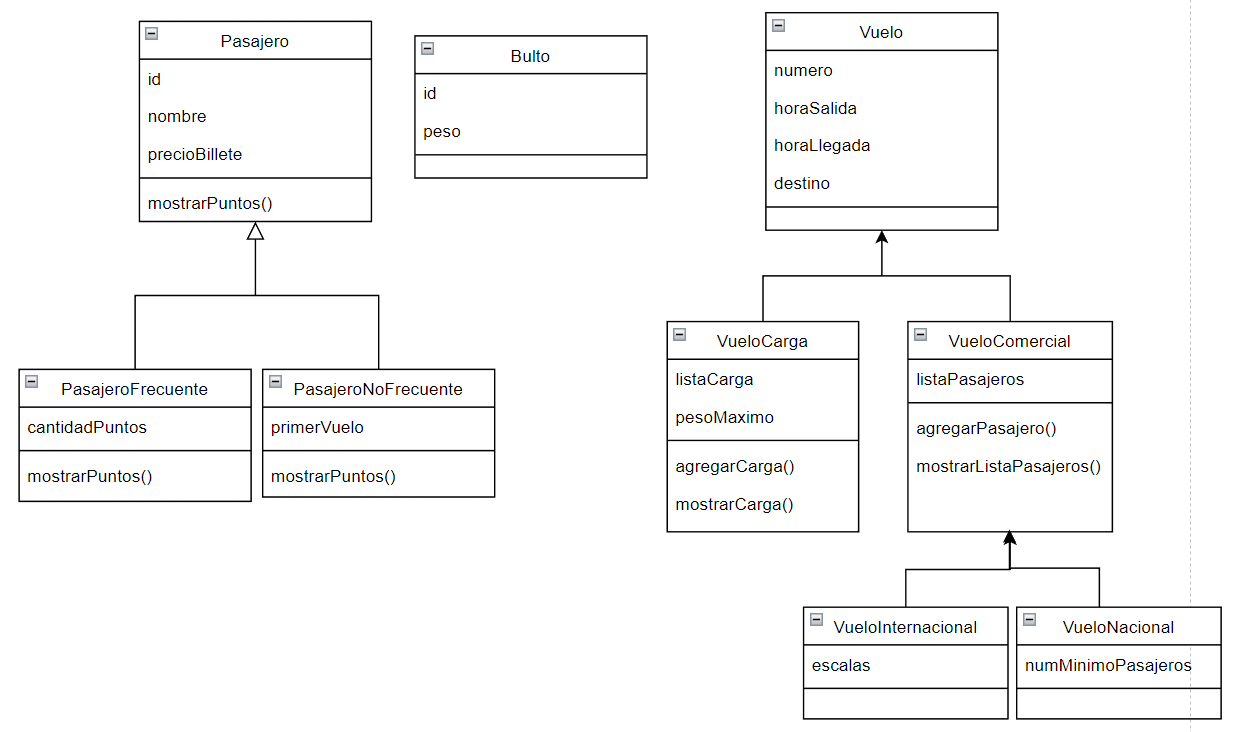

- Clase __Pasajero__: Representa a un pasajero con atributos de identificación, nombre y precio del billete. Los pasajeros tienen un método mostrarPuntos que se sobrescribe en sus clases hijas y un método __str__ para representar al pasajero como una cadena.

- Clase __PasajeroFrecuente__ (hereda de Pasajero): Representa a un pasajero frecuente con atributo adicional de puntos acumulados. Sobrescribe el método mostrarPuntos y __str__.

- Clase __PasajeroNoFrecuente__ (hereda de Pasajero): Representa a un pasajero no frecuente con atributo adicional primerVuelo (booleano). Sobrescribe el método mostrarPuntos y __str__.

- Clase __Bulto__: Representa un bulto con atributos de identificación y peso.

- Clase __Vuelo__: Representa un vuelo con atributos de número, hora de salida, hora de llegada y destino. Tiene un método __str__ para representar el vuelo como una cadena.

- Clase __VueloCarga__ (hereda de Vuelo): Representa un vuelo de carga con atributos adicionales de lista de bultos, peso máximo y peso total de carga. Tiene métodos agregarCarga, mostrarCarga (que tiene que mostrar el % de carga ocupada que lleva el vuelo) y sobrescribe el método __str__.

- Clase __VueloComercial__ (hereda de Vuelo): Representa un vuelo comercial con atributos adicionales de lista de pasajeros y total vendido (en €). Tiene métodos agregarPasajero, mostrarListaPasajeros y sobrescribe el método __str__.

- Clase __VueloInternacional__ (hereda de VueloComercial): Representa un vuelo internacional con atributo adicional de escalas. Sobrescribe el método __str__.

- Clase __VueloNacional__ (hereda de VueloComercial): Representa un vuelo nacional con atributo adicional de número mínimo de pasajeros. Sobrescribe el método __str__.

- Función __mostrarPuntos__: Función de polimorfismo que muestra los puntos de un pasajero, independientemente de si es frecuente o no frecuente.

### Pistas:

1. Cree una lista de pasajeros utilizando las clases Pasajero, PasajeroFrecuente y PasajeroNoFrecuente.
2. Cree una lista de bultos utilizando la clase Bulto.
3. Cree un objeto VueloCarga y agregue bultos utilizando el método agregarCarga(). Verifique si se agregan correctamente y si se manejan adecuadamente los casos en que se exceda el peso máximo permitido.
4. Cree un objeto VueloInternacional y agregue pasajeros utilizando el método agregarPasajero(). Muestre la lista de pasajeros y la información del vuelo.
5. Cree un objeto VueloNacional y agregue pasajeros utilizando el método agregarPasajero(). Muestre la lista de pasajeros y la información del vuelo.
6. Utilice la función mostrarPuntos() para mostrar los puntos de diferentes tipos de pasajeros (Pasajero, PasajeroFrecuente y PasajeroNoFrecuente) y observe cómo se maneja el polimorfismo en este caso.

#### Resultado

Así es como se tiene que ver aproximadamente la información de un vuelo:

```python
INFORMACIÓN VUELO 10
Hora salida: 10:00
Hora llegada: 19:00
Destino: Madrid 
Numero pasajeros: 4
Total Vendido: 940 € 
Numero minimo pasajeros: 4
```

O la información de los bultos o la carga de un vuelo

```python
AÑADIMOS LOS BULTOS
Bulto con ID : 1 añadido correctamente. Peso actual : 200/2500kg
Bulto con ID : 2 añadido correctamente. Peso actual : 2100/2500kg
Carga máxima rebasada, no se ha añadido el bulto con ID : 3. Peso con el bulto : 2600/2500kg

MOSTRAMOS LA CARGA
El vuelo tiene 2 objetos de un peso total 2100/2500 kg (84.0% lleno):
ID : 1 Peso : 200 kg
ID : 2 Peso : 1900 kg
```

In [4]:
class Pasajero:
    def __init__ (self, identidad, nombre, precio_billete) :
        self.__identidad = identidad
        self.__nombre = nombre
        self.__precio_billete = precio_billete
        
    def mostrar_puntos(self):
        print("Puntos del pasajero:")
        print("No dispone de puntos")
            
    #Getter
    @property
    def identidad(self):
        return self.__identidad

    #Setter
    @identidad.setter
    def identidad(self, identidad):
        self.__identidad = identidad
        
    #Getter
    @property
    def nombre(self):
        return self.__nombre

    #Setter
    @nombre.setter
    def nombre(self, nombre):
        self.__nombre = nombre
        
    #Getter
    @property
    def precio_billete(self):
        return self.__precio_billete

    #Setter
    @precio_billete.setter
    def precio_billete(self, precio_billete):
        self.__precio_billete = precio_billete
        
    def __str__(self):#Defino el metodo srt
        return " > Identidad: {}\n > Nombre: {}\n > Precio del billete: {}".format(self.identidad, 
                                                                                   self.nombre, 
                                                                                   self.precio_billete)   
    
class Pasajero_frecuente (Pasajero):
    
    def __init__ (self, identidad, nombre, precio_billete, cantidad_puntos):
        super().__init__(identidad, nombre, precio_billete)
        self.__cantidad_puntos= cantidad_puntos
    
    def mostrar_puntos(self):  # Método para mostrar los puntos
        print("Puntos del pasajero:")
        print(self.cantidad_puntos)
        
    #Getter
    @property
    def cantidad_puntos(self):
        return self.__cantidad_puntos

    #Setter
    @cantidad_puntos.setter
    def cantidad_puntos(self, cantidad_puntos):
        self.__cantidad_puntos = cantidad_puntos
        
    def __str__(self):#Defino el metodo srt
        return " > Identidad: {}\n > Nombre: {}\n > Precio del billete: {}\n > Cantidad de puntos".format(self.identidad, 
                                                                                                          self.nombre, 
                                                                                                          self.precio_billete,
                                                                                                          self.cantidad_puntos)   
    
class Pasajero_no_frecuente(Pasajero):
    
    def __init__ (self, identidad, nombre, precio_billete, primer_vuelo = True):
        super().__init__(identidad, nombre, precio_billete)
        self.__primer_vuelo = primer_vuelo
    
    def mostrar_puntos(self):  # Método para mostrar los puntos
        print("Puntos del pasajero:")
        print("Este pasajero no tiene Puntos")
        
    #Getter
    @property
    def primer_vuelo(self):
        return self.__primer_vuelo

    #Setter
    @primer_vuelo.setter
    def primer_vuelo(self, primer_vuelo):
        self.__primer_vuelo = primer_vuelo
        
    def __str__(self):#Defino el metodo srt
        return " > Identidad: {}\n > Nombre: {}\n > Precio del billete: {}\n > Primer vuelo".format(self.identidad, 
                                                                                                    self.nombre, 
                                                                                                    self.precio_billete,
                                                                                                    self.primer_vuelo)
    
class Bulto:
    
    def __init__ (self, identidad, peso):
        self.__identidad = identidad
        self.__peso = peso
        
     #Getter
    @property
    def identidad(self):
        return self.__identidad

    #Setter
    @identidad.setter
    def identidad(self, identidad):
        self.__identidad = identidad
        
     #Getter
    @property
    def peso(self):
        return self.__peso

    #Setter
    @peso.setter
    def peso(self, peso):
        self.__peso = peso
        
    def __str__(self):#Defino el metodo srt
        return " > Identidad: {}\n > Peso: {}".format(self.identidad, self.peso)  
    
class Vuelo:
    
    def __init__ (self, numero, hora_salida, hora_llegada, destino):
        self.__numero = numero
        self.__hora_salida = hora_salida
        self.__hora_llegada = hora_llegada
        self.__destino = destino
        
     #Getter
    @property
    def numero(self):
        return self.__numero

    #Setter
    @numero.setter
    def numero(self, numero):
        self.__numero = numero
        
     #Getter
    @property
    def hora_salida(self):
        return self.__hora_salida

    #Setter
    @hora_salida.setter
    def hora_salida(self, hora_salida):
        self.__hora_salida = hora_salida
        
     #Getter
    @property
    def hora_llegada(self):
        return self.__hora_llegada

    #Setter
    @hora_llegada.setter
    def hora_llegada(self, hora_llegada):
        self.__hora_llegada = hora_llegada
        
     #Getter
    @property
    def destino(self):
        return self.__destino

    #Setter
    @destino.setter
    def destino(self, destino):
        self.__destino = destino
        
    def __str__(self):#Defino el metodo srt
        return " > Numero: {}\n > Hora de salida: {}\n > Hora de llegada: {}\n > Destino{}".format(self.numero, 
                                                                                                   self.hora_salida, 
                                                                                                   self.hora_llegada,
                                                                                                   self.destino)
    
class Vuelo_carga (Vuelo):
    
    def __init__ (self, numero, hora_salida, hora_llegada, destino, lista_carga, peso_maximo):
        super().__init__(numero, hora_salida, hora_llegada, destino)
        self.__lista_carga = lista_carga
        self.__peso_maximo = peso_maximo
        
    def agregar_carga(self, bulto):
        peso_total = sum(bulto.peso for bulto in self.__lista_carga) + bulto.peso
        if peso_total <= self.peso_maximo:
            self.__lista_carga.append(bulto)
            print(f"Bulto con ID: {bulto.identidad} añadido correctamente. Peso actual: {peso_total}/{self.peso_maximo}kg")
        else:
            print(f"Carga máxima rebasada, no se ha añadido el bulto con ID: {bulto.identidad}. Peso con el bulto: {peso_total}/{self.peso_maximo}kg")
        
    def mostrar_carga(self):
        peso_total = sum(bulto.peso for bulto in self.__lista_carga)
        porcentaje_lleno = (peso_total / self.peso_maximo) * 100
        print(f"El vuelo tiene {len(self.lista_carga)} objetos de un peso total {peso_total}/{self.peso_maximo}kg ({porcentaje_lleno:.1f}% lleno):")
        for bulto in self.lista_carga:
            print(f"ID: {bulto.identidad} Peso: {bulto.peso} kg")
                
     #Getter
    @property
    def lista_carga(self):
        return self.__lista_carga

    #Setter
    @lista_carga.setter
    def numero(self, lista_carga):
        self.__lista_carga = lista_carga
        
     #Getter
    @property
    def peso_maximo(self):
        return self.__peso_maximo

    #Setter
    @peso_maximo.setter
    def peso_maximo(self, peso_maximo):
        self.__peso_maximo = peso_maximo
        
    def __str__(self):#Defino el metodo srt
        return " > Numero: {}\n > Hora de salida: {}\n > Hora de llegada: {}\n > Destino{}\n Lista de la carga{}\n Peso maximo".format(self.numero, 
                                                                                                                                       self.hora_salida, 
                                                                                                                                       self.hora_llegada,
                                                                                                                                       self.destino,
                                                                                                                                       self.lista_carga,
                                                                                                                                       self.peso_maximo)
    
class Vuelo_comercial (Vuelo):
    
    def __init__ (self, numero, hora_salida, hora_llegada, destino, lista_pasajeros):
        super().__init__(numero, hora_salida, hora_llegada, destino)
        self.__lista_pasajeros = lista_pasajeros
                
    def agregar_carga(self, pasajero):#metodo pra incorporar miembros
        self.__lista_pasajeros.append(pasajero)
        self.__total_vendido += pasajero.precio_billete
        
    def mostrar_carga(self):
        for pasajero in self.__lista_pasajeros:
            print ("Esta son los pasajeros de vuelo")
            print (lista_pasajeros)
                
     #Getter
    @property
    def lista_pasajeros(self):
        return self.__lista_pasajeros

    #Setter
    @lista_pasajeros.setter
    def lista_pasajeros(self, lista_pasajeros):
        self.__lista_pasajeros = lista_pasajeros
        
    def __str__(self):#Defino el metodo srt
        return " > Numero: {}\n > Hora de salida: {}\n > Hora de llegada: {}\n > Destino{}\n Lista de pasajeros{}".format(self.numero, 
                                                                                                                          self.hora_salida, 
                                                                                                                          self.hora_llegada,
                                                                                                                          self.destino,
                                                                                                                          self.lista_pasajeros)
    
class Vuelo_internacional (Vuelo_comercial):
    
    def __init__ (self, numero, hora_salida, hora_llegada, destino, lista_pasajeros, escalas):
        super().__init__(numero, hora_salida, hora_llegada, destino, lista_pasajeros)
        self.__escalas = escalas
                
    #Getter
    @property
    def escalas(self):
        return self.__escalas

    #Setter
    @escalas.setter
    def escalas(self, escalas):
        self.__escalas = escalas
        
    def __str__(self):#Defino el metodo srt
        return " > Numero: {}\n > Hora de salida: {}\n > Hora de llegada: {}\n > Destino{}\n Escalas{}".format(self.numero, 
                                                                                                               self.hora_salida, 
                                                                                                               self.hora_llegada,
                                                                                                               self.destino,
                                                                                                               self.escalas)
    
class Vuelo_nacional (Vuelo_comercial):
    
    def __init__ (self, numero, hora_salida, hora_llegada, destino, lista_pasajeros, numero_minimo_pasajeros):
        super().__init__(numero, hora_salida, hora_llegada, destino, lista_pasajeros)
        self.__numero_minimo_pasajeros = numero_minimo_pasajeros
                
    #Getter
    @property
    def numero_minimo_pasajeros(self):
        return self.__numero_minimo_pasajeros

    #Setter
    @numero_minimo_pasajeros.setter
    def numero_minimo_pasajeros(self, numero_minimo_pasajeros):
        self.__numero_minimo_pasajeros = numero_minimo_pasajeros
        
    def __str__(self):#Defino el metodo srt
        return " > Numero: {}\n > Hora de salida: {}\n > Hora de llegada: {}\n > Destino{}\n Numero minimo de pasajeros{}".format(self.numero, 
                                                                                                                                  self.hora_salida, 
                                                                                                                                  self.hora_llegada,
                                                                                                                                  self.destino,
                                                                                                                                  self.numero_minimo_pasajeros)
    
# Creamos los pasajeros
pasajero1 = Pasajero("123", "Juan", 200)
pasajero2 = Pasajero_frecuente("456", "María", 250, 100)
pasajero3 = Pasajero_no_frecuente("789", "Pedro", 180, primer_vuelo=False)

# Creamos bultos
bulto1 = Bulto("001", 20)
bulto2 = Bulto("002", 15)

# Creamos vuelo de carga y agregamos los bultos
vuelo_carga = Vuelo_carga("V001", "09:00", "12:00", "Ciudad X", [], 100)
vuelo_carga.agregar_carga(bulto1)
vuelo_carga.agregar_carga(bulto2)

# Verificamos la carga ocupada
print(vuelo_carga.mostrar_carga())
print("\n")
# Creamos el vuelo internacional y agregamos varios pasajeros
vuelo_internacional = Vuelo_internacional("VI001", "10:00", "15:00", "Ciudad Y", [pasajero1, pasajero2], ["Escala 1", "Escala 2"])
print("Lista de pasajeros del vuelo internacional:")
for pasajero in vuelo_internacional.lista_pasajeros:
    print(pasajero)
print(vuelo_internacional)
print("\n")
# Creamos el vuelo nacional y agregamos varios pasajeros
vuelo_nacional = Vuelo_nacional("VN001", "11:00", "14:00", "Ciudad Z", [pasajero1, pasajero3], 50)
print("Lista de pasajeros del vuelo nacional:")
for pasajero in vuelo_nacional.lista_pasajeros:
    print(pasajero)
print(vuelo_nacional)
print("\n")
# Función de polimorfismo para mostrar los puntos de diferentes tipos de pasajeros
def mostrarPuntos(pasajeros):
    for pasajero in pasajeros:
        pasajero.mostrar_puntos()

# Mostramos los puntos de los pasajeros
mostrarPuntos([pasajero1, pasajero2, pasajero3])

                                                                                                                                       

Bulto con ID: 001 añadido correctamente. Peso actual: 20/100kg
Bulto con ID: 002 añadido correctamente. Peso actual: 35/100kg
El vuelo tiene 2 objetos de un peso total 35/100kg (35.0% lleno):
ID: 001 Peso: 20 kg
ID: 002 Peso: 15 kg
None


Lista de pasajeros del vuelo internacional:
 > Identidad: 123
 > Nombre: Juan
 > Precio del billete: 200
 > Identidad: 456
 > Nombre: María
 > Precio del billete: 250
 > Cantidad de puntos
 > Numero: VI001
 > Hora de salida: 10:00
 > Hora de llegada: 15:00
 > DestinoCiudad Y
 Escalas['Escala 1', 'Escala 2']


Lista de pasajeros del vuelo nacional:
 > Identidad: 123
 > Nombre: Juan
 > Precio del billete: 200
 > Identidad: 789
 > Nombre: Pedro
 > Precio del billete: 180
 > Primer vuelo
 > Numero: VN001
 > Hora de salida: 11:00
 > Hora de llegada: 14:00
 > DestinoCiudad Z
 Numero minimo de pasajeros50


Puntos del pasajero:
No dispone de puntos
Puntos del pasajero:
100
Puntos del pasajero:
Este pasajero no tiene Puntos
